In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Mounting google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# load data to pandas dataframe
diabetes_df = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [ ]:
#checking for random data samples
diabetes_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
129,0,105,84,0,0,27.9,0.741,62,1
322,0,124,70,20,0,27.4,0.254,36,1
460,9,120,72,22,56,20.8,0.733,48,0
181,0,119,64,18,92,34.9,0.725,23,0
705,6,80,80,36,0,39.8,0.177,28,0


In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print(f'Number of patients with Diabetes : {len(diabetes_df[diabetes_df["Outcome"]==1])}')
print(f'Number of patients without Diabetes : {len(diabetes_df[diabetes_df["Outcome"]==0])}')

Number of patients with Diabetes : 268
Number of patients without Diabetes : 500


The data is quite unbalanced given that the number og patients without diabetes is double than the ones with diabetes. This might skew the data in favor of class with higher number of samples. This needs to be balanced later in order for the model to learn the right pattrns from them

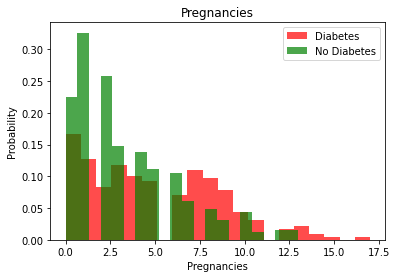

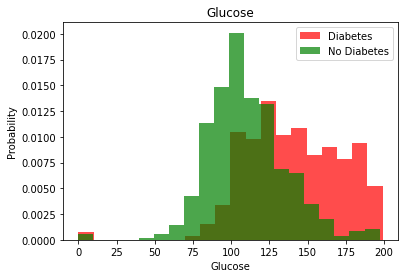

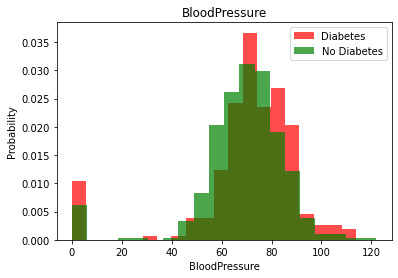

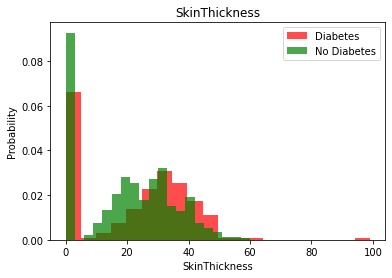

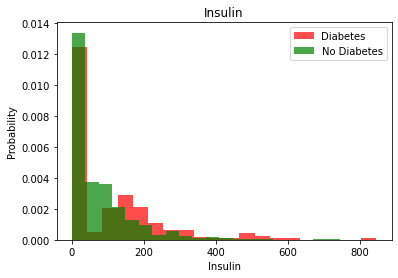

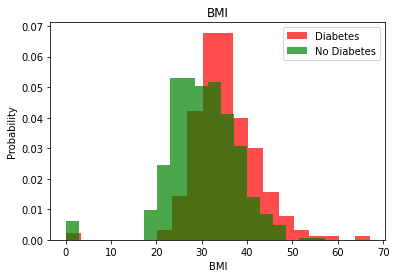

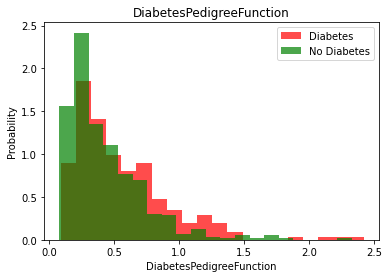

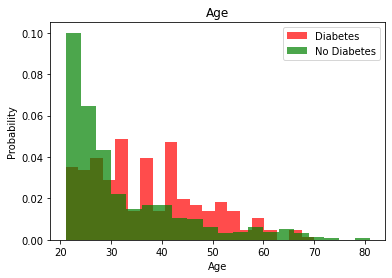

In [ ]:
for i in range (len(diabetes_df.columns[:-1])):
  label = diabetes_df.columns[i]
  plt.hist(diabetes_df[diabetes_df["Outcome"]==1][label], color = 'red', label = 'Diabetes', density = True, bins=20, alpha=0.7)
  plt.hist(diabetes_df[diabetes_df["Outcome"]==0][label], color = 'green' , label = 'No Diabetes', density = True, bins=20, alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [ ]:
X = diabetes_df[diabetes_df.columns[:-1]].values
Y = diabetes_df[diabetes_df.columns[-1]].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Training and evaluating model withing scaling and balancing the data

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size=0.2, random_state=0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
31/31 [==============================] - 1s 8ms/step - loss: 1.9919 - accuracy: 0.5377 - val_loss: 2.2181 - val_accuracy: 0.5285
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 1.5548 - accuracy: 0.5438 - val_loss: 1.6707 - val_accuracy: 0.5447
Epoch 3/20
31/31 [==============================] - 0s 2ms/step - loss: 1.2363 - accuracy: 0.5906 - val_loss: 1.3864 - val_accuracy: 0.4797
Epoch 4/20
31/31 [==============================] - 0s 2ms/step - loss: 1.0776 - accuracy: 0.5845 - val_loss: 1.0996 - val_accuracy: 0.6098
Epoch 5/20
31/31 [==============================] - 0s 2ms/step - loss: 1.0502 - accuracy: 0.6477 - val_loss: 1.2947 - val_accuracy: 0.4797
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.9644 - accuracy: 0.6049 - val_loss: 0.9231 - val_accuracy: 0.6341
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.6171 - val_loss: 0.8181 - val_accuracy: 0.6504
Epoch 8/20
31/31 [==

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7338


[0.6471028923988342, 0.7337662577629089]

## Model training after normalizing and oversampling the data


In [ ]:
# Scaling the data to normalize the features into similar range
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=diabetes_df.columns)

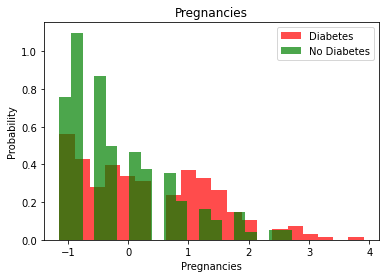

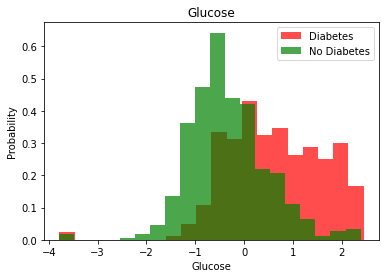

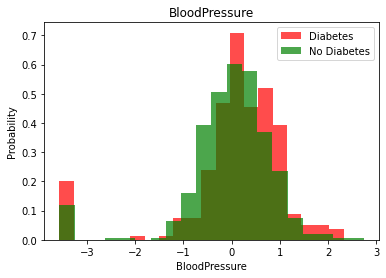

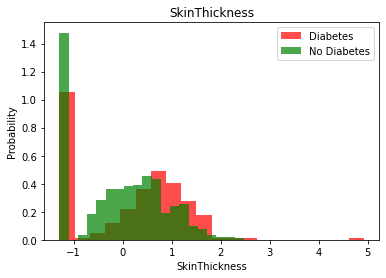

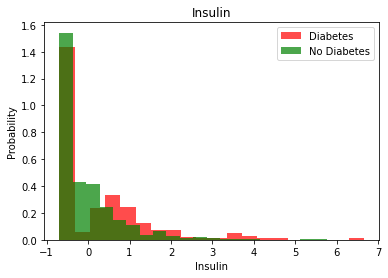

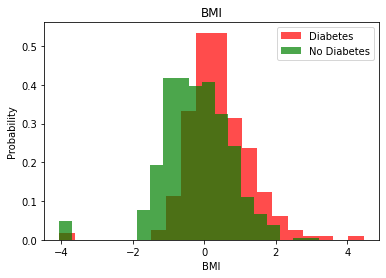

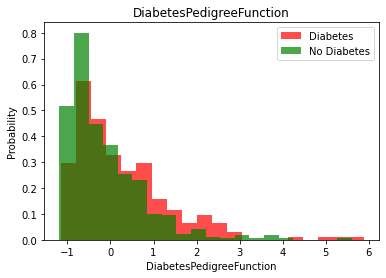

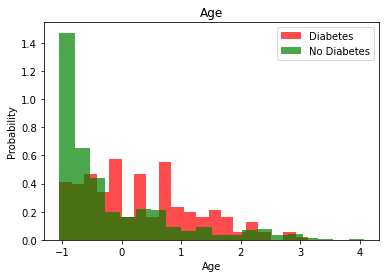

In [ ]:
for i in range (len(diabetes_df.columns[:-1])):
  label = diabetes_df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"]==1][label], color = 'red', label = 'Diabetes', density = True, bins=20, alpha=0.7)
  plt.hist(transformed_df[transformed_df["Outcome"]==0][label], color = 'green' , label = 'No Diabetes', density = True, bins=20, alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [ ]:
# Oversampling the data to make the number of samples balanced for both classes
over_sampler = RandomOverSampler()
X, Y = over_sampler.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=diabetes_df.columns)

In [ ]:
X , len(X)

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 2.12477957,  0.53535234,  0.25303625, ...,  0.52131088,
          0.25708367,  1.4259954 ],
        [-0.54791859, -0.59134489,  0.87340925, ...,  1.71435179,
         -1.04156736, -0.87137393],
        [ 0.3429808 , -0.27837344, -0.16054575, ...,  0.7370736 ,
         -0.63687146,  0.66020563]]), 1000)

In [ ]:
Y, len(Y)

(array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

In [ ]:
print(f'Number of patients with Diabetes : {len(transformed_df[transformed_df["Outcome"]==1])}')
print(f'Number of patients without Diabetes : {len(transformed_df[transformed_df["Outcome"]==0])}')

Number of patients with Diabetes : 500
Number of patients without Diabetes : 500


In [35]:
X_temp, X_test, y_temp, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size=0.2, random_state=0)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
40/40 [==============================] - 1s 5ms/step - loss: 0.7580 - accuracy: 0.4641 - val_loss: 0.6911 - val_accuracy: 0.5875
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5391 - val_loss: 0.6373 - val_accuracy: 0.7188
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6297 - val_loss: 0.6052 - val_accuracy: 0.7437
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6922 - val_loss: 0.5792 - val_accuracy: 0.7375
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7312 - val_loss: 0.5563 - val_accuracy: 0.7688
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7312 - val_loss: 0.5301 - val_accuracy: 0.7937
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7453 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 8/20
40/40 [==

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7900


[0.42602208256721497, 0.7900000214576721]

In [39]:
predictions = model.predict(X_test)
predictions

7/7 [==============================] - 0s 2ms/step


array([[0.8251362 ],
       [0.9552071 ],
       [0.66522104],
       [0.05287896],
       [0.3636473 ],
       [0.44502872],
       [0.04331151],
       [0.7530948 ],
       [0.717291  ],
       [0.13668784],
       [0.24617042],
       [0.77058154],
       [0.8065069 ],
       [0.04539252],
       [0.5645741 ],
       [0.01579802],
       [0.7310278 ],
       [0.8933407 ],
       [0.6660672 ],
       [0.29963535],
       [0.6993869 ],
       [0.60014397],
       [0.1549823 ],
       [0.38344714],
       [0.81965554],
       [0.11653038],
       [0.91369313],
       [0.02980365],
       [0.08260237],
       [0.04999787],
       [0.8603682 ],
       [0.63931036],
       [0.8007598 ],
       [0.82697725],
       [0.8553509 ],
       [0.19906303],
       [0.76373297],
       [0.43073562],
       [0.9646288 ],
       [0.81914014],
       [0.8524308 ],
       [0.7964048 ],
       [0.63034964],
       [0.5340994 ],
       [0.30461076],
       [0.6361412 ],
       [0.7254847 ],
       [0.593

<ipython-input-48-5e66f48f5abc>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


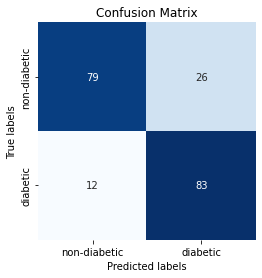

In [48]:
#converting the predictied probablities into binary class
test_preditions = [1 if preds > 0.5 else 0 for preds in predictions]

matrix_confusion = confusion_matrix(y_test, test_preditions)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-diabetic', 'diabetic']); ax.yaxis.set_ticklabels(['non-diabetic', 'diabetic']);

Here the number of false negatives i.e patients that are not diabetic but are labeld as diabetid is 23. And the false positives, i.e patients that are diabetic but are labeld as non diabetid is 20. We need to create or tune a model in order to reduce these miss classifications. However, it needs to be noted that the greater false positive numbers with have more serious consequences in real application, if the diabetic patiens go undiagnosed. Non diabetic patiens if wrongly diagnosed will still reflect badly on the model but the damage control is just a second screening away.

Also, since deep learning requeirs big volume of data for the model to learn the right patters off of the features, using classic machile leaning models could be another option for this project